# Multilayer Perceptron Regression (MLP)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('DatasetMonthly3.csv')
train = dataset.iloc[0:123,:] 
test = dataset.iloc[123:-1,:] 

X_train = np.array(train.iloc[:, 0]).reshape(-1, 1)
y_train = np.array(train.iloc[:, 1]).reshape(-1, 1)
X_test = np.array(test.iloc[:, 0]).reshape(-1, 1)
y_test = np.array(test.iloc[:, 1]).reshape(-1, 1)

## Feature Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)




## Training the MLP model on the Training set

In [4]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

regressor = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regressor.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([34530.19044154, 34555.01409307, 34580.66519965, 34605.48885117,
       34631.13995775, 34656.79106433, 34681.61471585, 34707.26582243,
       34732.08947395, 34757.74058053, 34783.39168711, 34806.56042853,
       34832.21153511, 34857.03518663, 34882.68629321, 34907.50994474,
       34933.16105131, 34958.81215789, 34983.63580942, 35009.28691599,
       35034.11056752, 35059.7616741 , 35085.41278067, 35109.40897715,
       35135.06008373, 35159.88373525, 35185.53484183, 35210.35849335,
       35236.00959993, 35261.66070651, 35286.48435803, 35312.13546461,
       35336.95911614, 35362.61022271, 35388.26132929, 35411.43007072,
       35437.08117729, 35461.90482882, 35487.55593539, 35512.37958692,
       35538.0306935 , 35563.68180007, 35588.5054516 , 35614.15655818,
       35638.9802097 , 35664.63131628, 35690.28242286, 35713.45116428,
       35739.10227086, 35763.92592238, 35789.57702896, 35814.40068049,
       35840.05178706, 35865.70289364, 35890.52654517, 35916.17765174,
      

## Predicting the Test set results

In [5]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[39724557.22 39591854.  ]
 [39821556.07 39100499.  ]
 [39918180.92 37726472.88]
 [40011589.1  37866809.  ]
 [40107846.16 38550694.  ]
 [40201886.35 38894976.  ]
 [40291720.27 40100440.59]
 [40384548.66 40950726.39]
 [40474382.58 39838307.03]
 [40567210.96 40738291.74]
 [40660039.35 40699842.98]
 [40743884.34 39735951.44]
 [40836712.73 39573744.46]
 [40926546.65 38179073.88]
 [41019375.03 37240557.1 ]
 [41109208.96 36792495.92]
 [41202037.34 37836828.47]
 [41294865.73 37818309.05]
 [41384699.65 39252000.52]
 [41477528.03 39201262.49]
 [41566173.77 38645417.47]
 [41657000.37 38376549.11]
 [41747826.96 38693924.07]
 [41832793.77 39427420.71]
 [41923620.37 40248709.4 ]
 [42011517.07 38626336.87]
 [42102343.66 37527874.44]
 [42190240.37 37232054.08]
 [42281066.96 37668458.76]
 [42371805.44 38319671.43]
 [42459322.18 38175488.11]
 [42549756.14 38728525.32]
 [42637272.88 38754623.81]
 [42727706.84 39342315.85]
 [42818140.81 38813276.99]
 [42899823.1  40518867.04]
 [42990257.06 39408438.43]
 

## Evaluating the Model Performance

In [6]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
print(r2_score(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

-10.209918141497567
3750960.555533535


## Visualising the MLP Regression results (for higher resolution and smoother curve)

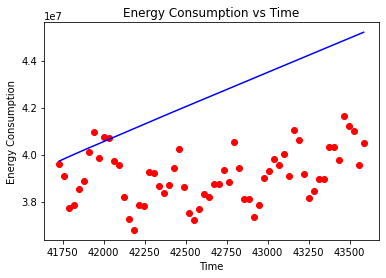

In [7]:
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Energy Consumption vs Time')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.show()